In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%run -i helper_functions.py

## Load cleaned data set

In [3]:
df = pd.read_csv('./output/cleaned_loan_data.csv', low_memory=False)
df.shape

(1786867, 26)

## Exploratory Data Analysis

In [4]:
# Print all unique values for each column
print_unique_values(df)

application_type: ['Individual' 'Joint App']
chargeoff_within_12_mths: [ 0.  1.  2.  3.  4.  5.  8.  6.  7.  9. 10.]
emp_length: [ 4  2 10  3  5  6  1  7  0  9  8]
grade: ['B' 'A' 'C' 'D' 'E' 'F' 'G']
home_ownership: ['RENT' 'MORTGAGE' 'OWN' 'NONE' 'OTHER' 'ANY']
inq_last_6mths: [1. 2. 0. 3. 4. 5. 6. 7. 8.]
loan_status: ['Fully Paid' 'Non-Performing']
purpose: ['debt_consolidation' 'home_improvement' 'other' 'credit_card'
 'major_purchase' 'small_business' 'house' 'moving' 'medical' 'car'
 'vacation' 'renewable_energy' 'wedding' 'educational']
term: [36 60]
verification_status: ['Not Verified' 'Source Verified' 'Verified']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786867 entries, 0 to 1786866
Data columns (total 26 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   addr_state                object 
 1   annual_inc                float64
 2   application_type          object 
 3   avg_cur_bal               float64
 4   bc_util                   float64
 5   chargeoff_within_12_mths  float64
 6   delinq_2yrs               float64
 7   dti                       float64
 8   emp_length                int64  
 9   emp_title                 object 
 10  fico_range_high           float64
 11  fico_range_low            float64
 12  grade                     object 
 13  home_ownership            object 
 14  inq_last_6mths            float64
 15  installment               float64
 16  int_rate                  float64
 17  issue_d                   object 
 18  loan_amnt                 float64
 19  loan_status               object 
 20  purpose                 

Number of unique values: 51


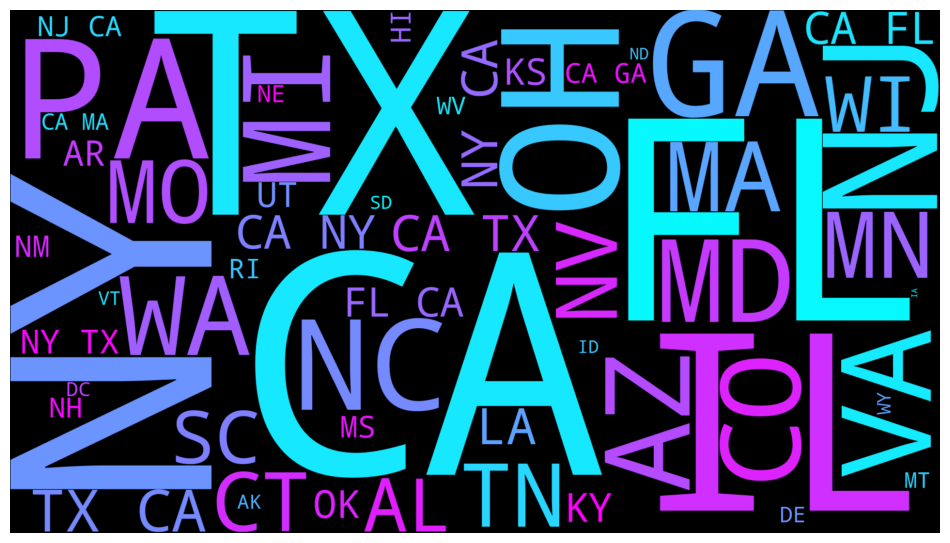

In [6]:
create_wordcloud(df['addr_state'])

### Employment Titles

Let's plot the wordcloud for employment titles

Number of unique values: 355972


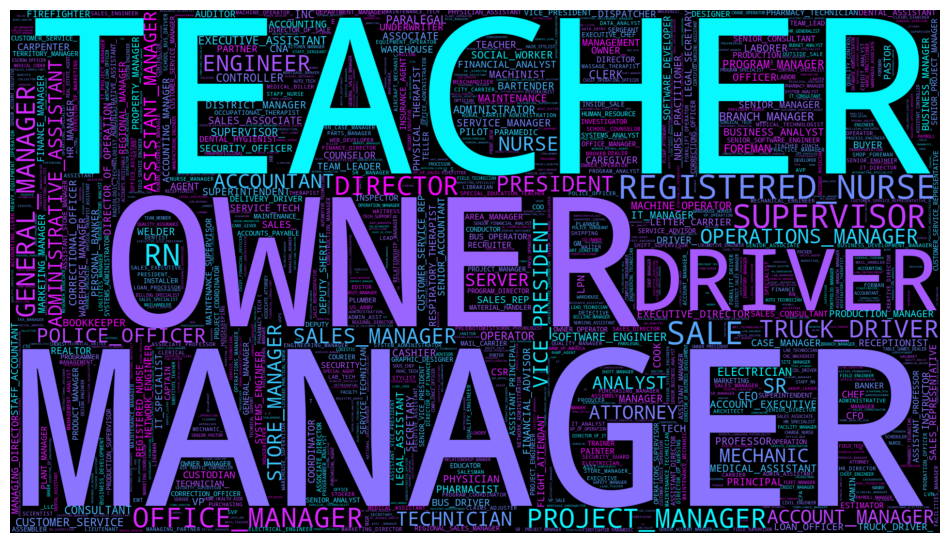

In [7]:
create_wordcloud(df['emp_title'])

#### Control the number of employee titles to work with

In [8]:
NUM_OF_TOP_EMP_TITLES = 20

In [9]:
top_emp_titles = df['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index
df_top_emp_titles = df[df['emp_title'].isin(top_emp_titles)]

In [10]:
df_top_emp_titles.sample(10)

,addr_state,annual_inc,application_type,avg_cur_bal,bc_util,chargeoff_within_12_mths,delinq_2yrs,dti,emp_length,emp_title,...,int_rate,issue_d,loan_amnt,loan_status,purpose,revol_bal,revol_util,sub_grade,term,verification_status
1551617,NC,75000.0,Individual,4796.0,35.4,0.0,1.0,11.18,5,PRESIDENT,...,0.1274,2016-12-01,25000.0,Fully Paid,debt_consolidation,17262.0,0.354,C1,36,Source Verified
1123464,TX,55000.0,Individual,15858.0,41.0,1.0,3.0,15.06,10,TEACHER,...,0.1229,2015-04-01,7800.0,Fully Paid,debt_consolidation,7837.0,0.398,C1,36,Not Verified
964040,UT,62000.0,Individual,4766.0,95.1,0.0,0.0,21.68,10,MANAGER,...,0.1399,2015-08-01,10000.0,Fully Paid,debt_consolidation,9238.0,0.642,C4,60,Verified
1612126,PA,70000.0,Individual,10788.0,47.9,0.0,0.0,28.51,10,REGISTERED_NURSE,...,0.1279,2016-10-01,8000.0,Fully Paid,other,28968.0,0.650,C1,36,Not Verified
22862,FL,55000.0,Individual,10198.0,91.0,0.0,0.0,26.99,5,TRUCK_DRIVER,...,0.2340,2013-11-01,6075.0,Fully Paid,other,27714.0,0.986,E5,36,Source Verified
1069756,NJ,148000.0,Individual,17353.0,69.0,0.0,0.0,16.50,10,RN,...,0.2299,2015-06-01,25925.0,Fully Paid,debt_consolidation,7755.0,0.510,F2,60,Verified
318929,GA,45000.0,Individual,7085.0,58.6,0.0,0.0,18.69,4,OFFICE_MANAGER,...,0.1747,2018-03-01,10000.0,Fully Paid,debt_consolidation,3282.0,0.586,D1,36,Source Verified
754156,OH,75000.0,Individual,1695.0,39.1,0.0,0.0,3.04,10,ENGINEER,...,0.1659,2014-04-01,12800.0,Fully Paid,home_improvement,8475.0,0.391,D1,60,Verified
803445,CA,56000.0,Individual,26610.0,61.4,0.0,0.0,27.82,3,REGISTERED_NURSE,...,0.1099,2014-02-01,10000.0,Fully Paid,credit_card,4791.0,0.532,B2,36,Verified
954146,AR,50000.0,Individual,3957.0,62.0,0.0,0.0,27.75,10,OFFICE_MANAGER,...,0.0818,2015-09-01,12000.0,Non-Performing,debt_consolidation,15116.0,0.500,B1,36,Not Verified


In [11]:
df_top_emp_titles['emp_title'].value_counts()

emp_title
TEACHER               36462
MANAGER               35176
OWNER                 23590
REGISTERED_NURSE      17139
DRIVER                16865
SUPERVISOR            15189
SALES                 14539
RN                    13617
OFFICE_MANAGER        10539
PROJECT_MANAGER       10517
GENERAL_MANAGER        9795
TRUCK_DRIVER           8899
DIRECTOR               7619
PRESIDENT              7056
ENGINEER               7027
SALES_MANAGER          6424
OPERATIONS_MANAGER     6107
POLICE_OFFICER         5642
STORE_MANAGER          5437
NURSE                  5415
Name: count, dtype: int64

In [12]:
# Top 20 employment titles as a percentage of total records
print(f'Top 20 employment titles as a percentage of total records: {df_top_emp_titles["emp_title"].value_counts().sum()/len(df)*100}%')

Top 20 employment titles as a percentage of total records: 14.721520963787457%


In [13]:
# Compute and print the mean loan amount for each of the top employment titles
print(df_top_emp_titles.groupby('emp_title')['loan_amnt'].mean().sort_values(ascending=False))

# Print the mean loan amount for df_top_emp_titles
print(f'Mean loan amount for top {NUM_OF_TOP_EMP_TITLES} employment titles: {df_top_emp_titles["loan_amnt"].mean()}')

emp_title
PRESIDENT             20753.245465
DIRECTOR              19611.684604
SALES_MANAGER         17588.912671
ENGINEER              17197.964992
PROJECT_MANAGER       17183.605116
GENERAL_MANAGER       16886.860643
POLICE_OFFICER        16784.349521
REGISTERED_NURSE      16639.128596
OWNER                 16598.997457
OPERATIONS_MANAGER    16461.482725
RN                    16165.543071
MANAGER               15245.874318
STORE_MANAGER         14578.393415
SALES                 14482.894284
NURSE                 14315.734072
SUPERVISOR            14157.622292
TEACHER               14137.734491
TRUCK_DRIVER          14136.366446
DRIVER                13287.883190
OFFICE_MANAGER        13221.531929
Name: loan_amnt, dtype: float64
Mean loan amount for top 20 employment titles: 15553.218065492256


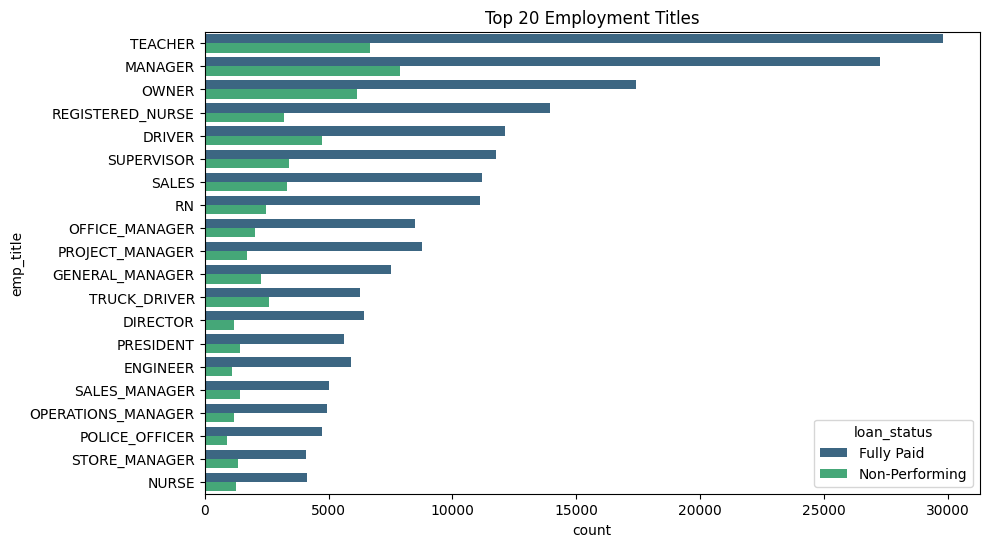

In [14]:
# Plot the top 'emp_title' values against loan_status
plt.figure(figsize=(10, 6))
#ax = sns.countplot(y='emp_title', data=df, order=df['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index, hue='loan_status', palette='viridis')
ax = sns.countplot(y='emp_title', data=df_top_emp_titles, order=df_top_emp_titles['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index, hue='loan_status', palette='viridis')

#plt.xticks(rotation=90)
plt.title('Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Titles')
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_vs_loan_status.png', dpi=300, bbox_inches='tight')
plt.show()


loan_status         Fully Paid  Non-Performing     ratio
emp_title                                               
DIRECTOR              0.845518        0.154482  0.182707
DRIVER                0.718292        0.281708  0.392191
ENGINEER              0.840899        0.159101  0.189203
GENERAL_MANAGER       0.766207        0.233793  0.305130
MANAGER               0.775330        0.224670  0.289774
NURSE                 0.763250        0.236750  0.310186
OFFICE_MANAGER        0.805295        0.194705  0.241782
OPERATIONS_MANAGER    0.806943        0.193057  0.239245
OWNER                 0.738872        0.261128  0.353414
POLICE_OFFICER        0.840659        0.159341  0.189542
PRESIDENT             0.799036        0.200964  0.251508
PROJECT_MANAGER       0.836075        0.163925  0.196065
REGISTERED_NURSE      0.813933        0.186067  0.228602
RN                    0.817434        0.182566  0.223340
SALES                 0.771442        0.228558  0.296273
SALES_MANAGER         0.780199 

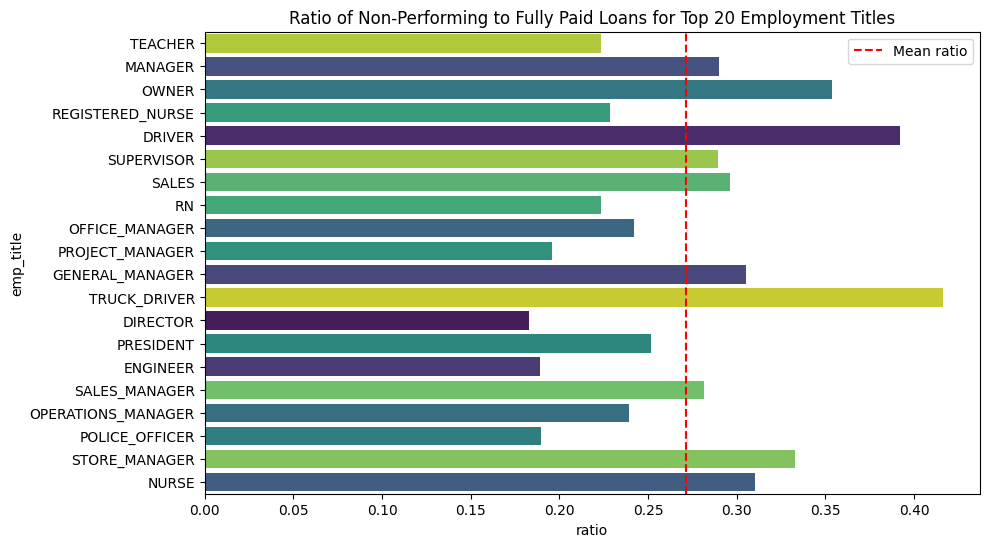

In [15]:
# Get the top 'emp_title' values, then compute the ratio of Non-Current loans to Current loans
#top_emp_title = df['emp_title'].value_counts().head(NUM_OF_TOP_EMP_TITLES).index

#emp_title_ratio = df[df['emp_title'].isin(top_emp_title)].groupby('emp_title')['loan_status'].value_counts(normalize=True).unstack()
emp_title_ratio = df_top_emp_titles.groupby('emp_title')['loan_status'].value_counts(normalize=True).unstack()
emp_title_ratio['ratio'] = emp_title_ratio['Non-Performing'] / emp_title_ratio['Fully Paid']
print(emp_title_ratio)

mean_ratio = emp_title_ratio['ratio'].mean()
print(f"Mean ratio: {mean_ratio}")

# Plot the ratio of Non-Current loans to Current loans for the top 10 'emp_title' values
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='ratio', 
    y=emp_title_ratio.index,
    hue=emp_title_ratio.index,
    data=emp_title_ratio,
    order=df_top_emp_titles['emp_title'].value_counts().index,
    palette='viridis')

# Add the mean ratio to the plot
plt.axvline(mean_ratio, color='red', linestyle='--', label='Mean ratio')
plt.legend()

plt.title('Ratio of Non-Performing to Fully Paid Loans for Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Titles')
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_ratio.png', dpi=300, bbox_inches='tight')
plt.show()


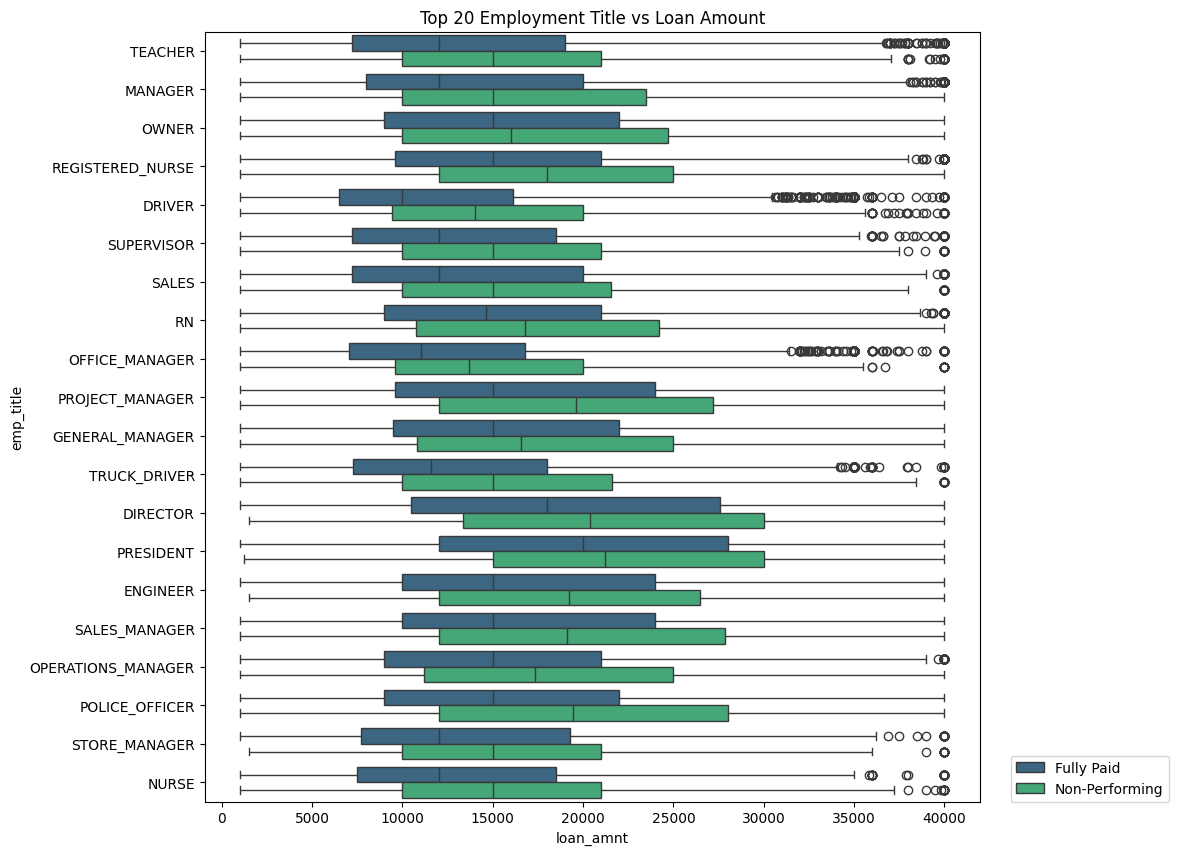

In [16]:
# Plot disitribution of top 'emp_title' against loan_amount
plt.figure(figsize=(10, 10))
sns.boxplot(x='loan_amnt', y='emp_title', data=df_top_emp_titles, order=df_top_emp_titles['emp_title'].value_counts().index, hue='loan_status', palette='viridis')
plt.title('Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Title vs Loan Amount')
plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0)
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_vs_loan_amnt.png', dpi=300, bbox_inches='tight')
plt.show()


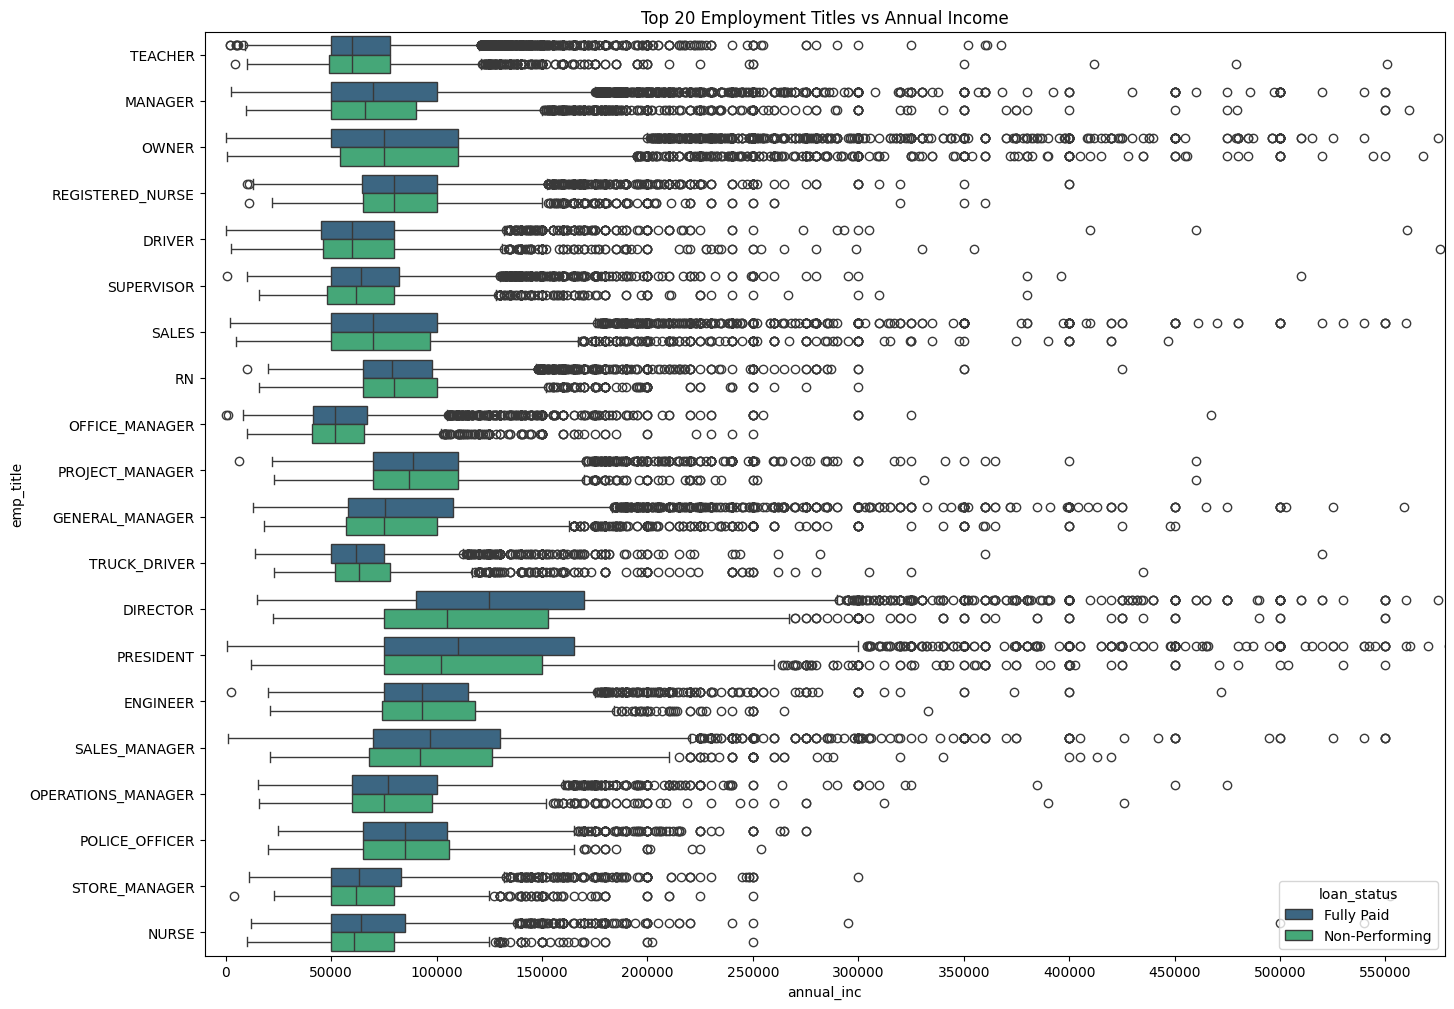

In [17]:
# Plot disitribution of top 'emp_title' against annual_inc
plt.figure(figsize=(16, 12))
sns.boxplot(x='annual_inc', y='emp_title', hue='loan_status', data=df_top_emp_titles, order=df_top_emp_titles['emp_title'].value_counts().index, palette='viridis')
# Set the x-axis limit to $578,126 (starting for 37% tax bracket), adding padding to the left
plt.xlim(-10000, 578126)
plt.xticks(np.arange(0, 600000, 50000))

#plt.subplots_adjust(right=2)

plt.title('Top ' + str(NUM_OF_TOP_EMP_TITLES) + ' Employment Titles vs Annual Income')
plt.savefig('./output/emp_title_top' + str(NUM_OF_TOP_EMP_TITLES) + '_vs_annual_inc2.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# Drop 'emp_title' column
#df.drop('emp_title', axis=1, inplace=True)

### Impute missing values

In [19]:
# Fill empty values with -1
#df.fillna({'inq_fi': -1}, inplace=True)
#df.fillna({'inq_last_12m': -1}, inplace=True)

#df_pruned['emp_length'].fillna(-1, inplace=True)

In [20]:
# print the percentage loan_status for each value in inq_fi
#print_loan_status_percentage(df, 'inq_fi')


Based on the distribution of loan_status for each value of inq_fi, we update inq_fi=-1 to be the value with the closest percentage of 'Current'.


In [21]:
# Set inq_fi = -1 to 1
#df['inq_fi'] = df['inq_fi'].replace(-1, 6.0)

In [22]:
# print the percentage loan_status for each value in inq_last_12m
#print_loan_status_percentage(df, 'inq_last_12m')

We do the same for `inq_last_12m`

In [23]:
# Set inq_last_12m = -1 to 9.0
#df['inq_last_12m'] = df['inq_last_12m'].replace(-1, 9.0)

In [24]:
# Binary encode 'application_type'
df['application_type'] = df['application_type'].astype(str).replace(
    {
        'Individual': 1,
        'Joint App': 0
    }
).infer_objects(copy=False)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_12478/3520989426.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['application_type'] = df['application_type'].astype(str).replace(


## Target encoding of categorical features
https://www.blog.trainindata.com/target-encoder-a-powerful-categorical-encoding-method/

### Encode loan `grade`

In [25]:
# Encode 'grade' to ordinal values
df['grade'] = df['grade'].astype(str).replace(
    {
        'A': 0,
        'B': 1,
        'C': 2,
        'D': 3,
        'E': 4,
        'F': 5,
        'G': 6
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_12478/258190725.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['grade'] = df['grade'].astype(str).replace(


In [26]:
# Encode 'verification_status' to ordinal values
df['verification_status'] = df['verification_status'].astype(str).replace(
    {
        'Not Verified': 0,
        'Source Verified': 1,
        'Verified': 2
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_12478/3755547314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['verification_status'] = df['verification_status'].astype(str).replace(


In [27]:
# One hot encode 'home_ownership'
df = pd.get_dummies(df, columns=['home_ownership'])


In [28]:
# One hot encode 'purpose'
df = pd.get_dummies(df, columns=['purpose'])


In [29]:
# Binary encode 'loan_status'
df['loan_status'] = df['loan_status'].astype(str).replace(
    {
        'Fully Paid': 1,
        'Non-Performing': 0
    }
).infer_objects(copy=False).astype(int)

/var/folders/ys/cs7c6xf95w303n3hgcygfdhw0000gp/T/ipykernel_12478/3789975610.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status'] = df['loan_status'].astype(str).replace(


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786867 entries, 0 to 1786866
Data columns (total 44 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   addr_state                  object 
 1   annual_inc                  float64
 2   application_type            int64  
 3   avg_cur_bal                 float64
 4   bc_util                     float64
 5   chargeoff_within_12_mths    float64
 6   delinq_2yrs                 float64
 7   dti                         float64
 8   emp_length                  int64  
 9   emp_title                   object 
 10  fico_range_high             float64
 11  fico_range_low              float64
 12  grade                       int64  
 13  inq_last_6mths              float64
 14  installment                 float64
 15  int_rate                    float64
 16  issue_d                     object 
 17  loan_amnt                   float64
 18  loan_status                 int64  
 19  revol_bal            

In [31]:
df['loan_status'].value_counts(normalize=True)

loan_status
1    0.796257
0    0.203743
Name: proportion, dtype: float64

## Save engineered data to disk

In [32]:
# Save the cleaned data to a new csv file
df.to_csv('./output/engineered_loan_data.csv', index=False)

### Sample a small percentage for exploration

In [33]:
# Sample 10% of the data while retaining the same distribution of loan_status
#df_sampled = df_pruned.sample(frac=0.05, replace=False, random_state=42, weights = df_pruned.groupby('loan_status')['loan_status'].transform('count'))
#df_sampled['loan_status'].value_counts(normalize=True)

df_sampled = df

In [34]:
df_sampled.shape

(1786867, 44)

In [35]:
skip_plot_features = [
    'acc_now_delinq',
    'emp_title',
    'sub_grade',
    'inq_fi',
    'inq_last_6mths',
    'inq_last_12m',
    'int_rate',
    'issue_d', 
    'last_credit_pull_d',
    'mort_acc',
    'revol_util'
]

Number of columns to plot: 44
Skipping emp_title
Skipping inq_last_6mths
Skipping int_rate
Skipping issue_d
Skipping revol_util
Skipping sub_grade


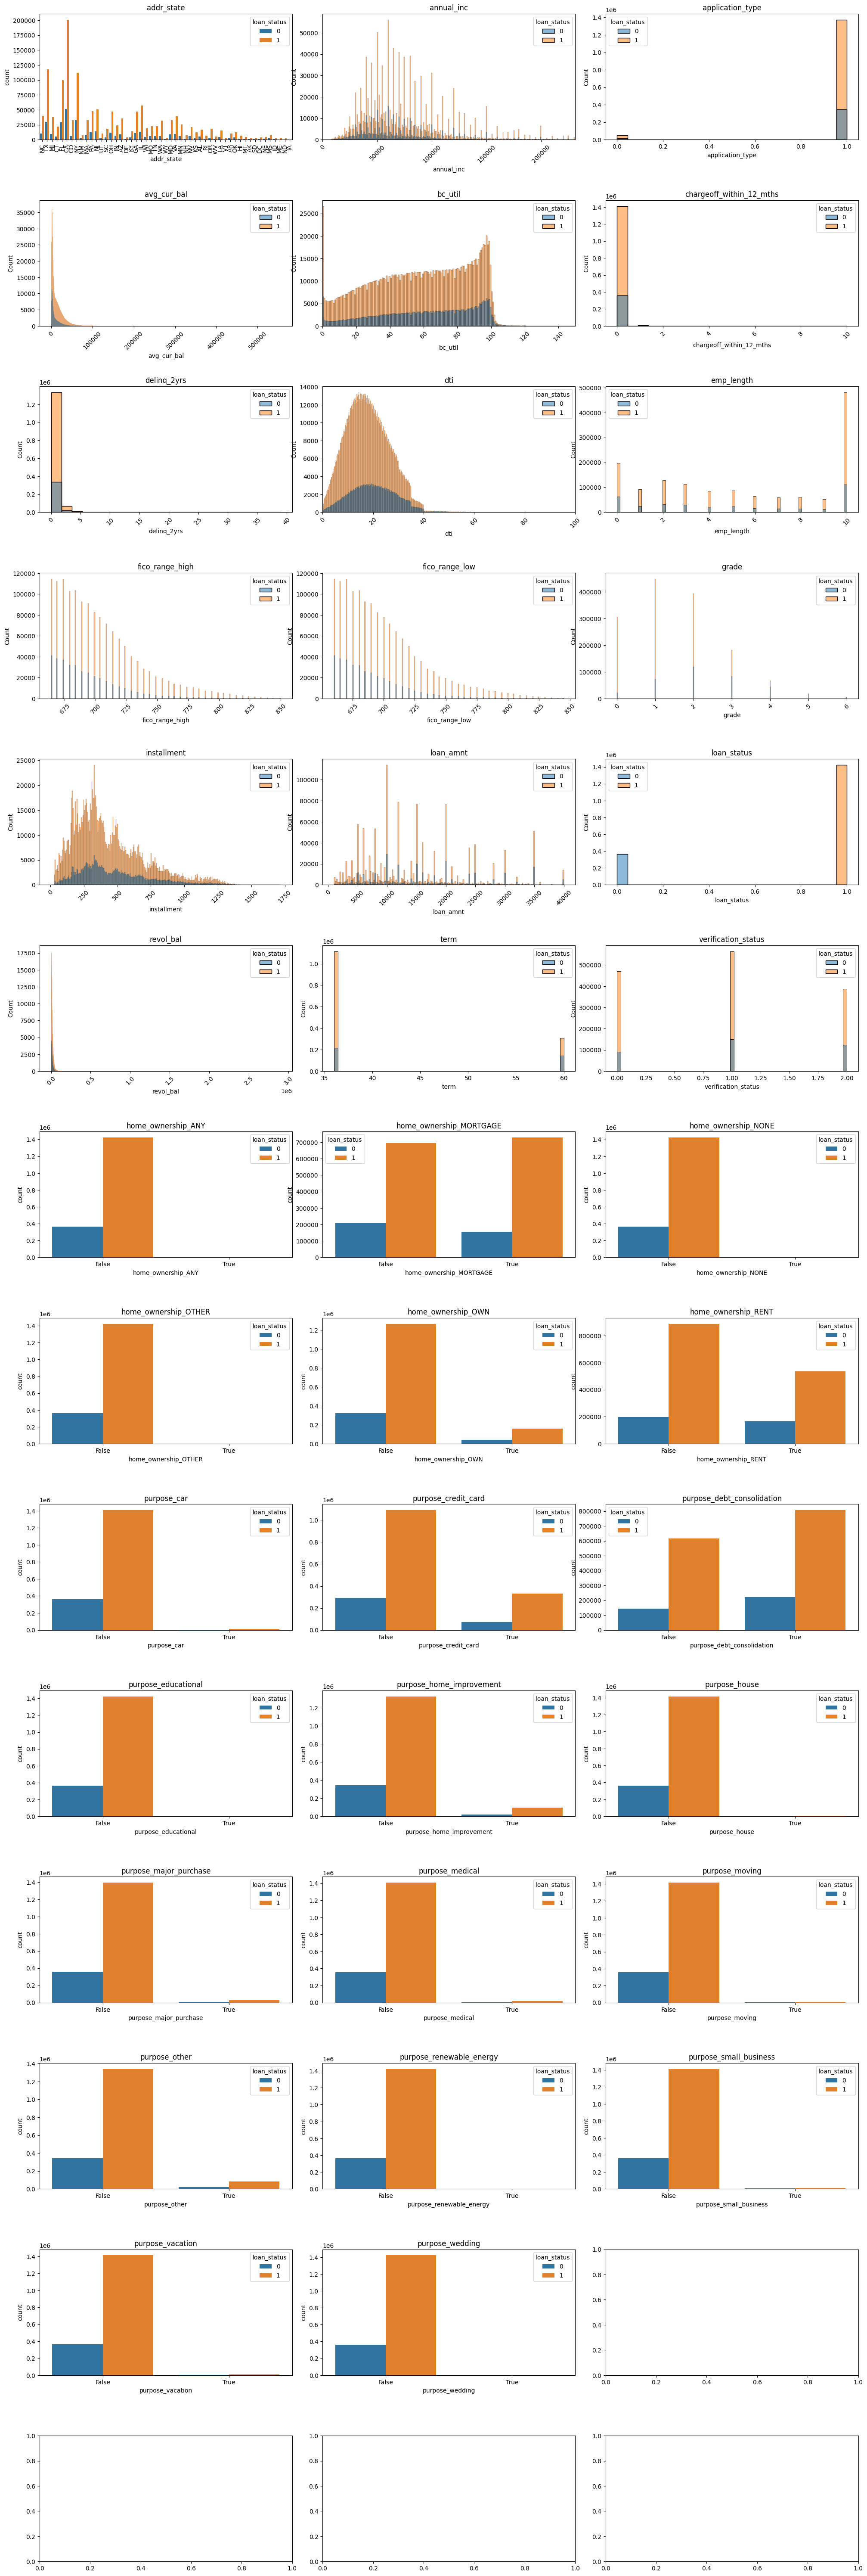

In [36]:
# Number of columns we will be plotting
n_cols = df_sampled.shape[1]
print(f'Number of columns to plot: {n_cols}')

# Create a grid of subplots with size (20, 60).  Grid should have 3 columns and the number of rows should be calculated based on the number of columns in the dataframe
plt.subplots(n_cols//3, 3,figsize=(20,60))

# Add margins between each subplot
plt.tight_layout(pad=2.0, h_pad=8.0, w_pad=2.0)

col_idx = 0

# Loop through each column in the dataframe
for col in df_sampled.columns:

    if col in skip_plot_features:
        print(f'Skipping {col}')
        continue

    # Plot in the ith position
    plt.subplot(n_cols//3, 3,col_idx+1)

    # if col is numeric
    if df_sampled[col].dtype in ['int64', 'float64']:
        if col == 'annual_inc':
            # Set the x-axis limit to $231,250 (35% tax bracket)
            plt.xlim(0, 231250)
        if col == 'bc_util':
            # Set the x-axis limit to 150%
            plt.xlim(0, 150)
        if col == 'dti':
            # Set the x-axis limit to 100%
            plt.xlim(0, 100)
        # if col has 'last_fico' in its name
        if 'last_fico' in col:
            # Set the x-axis limit to 850
            plt.xlim(475, 850)
        sns.histplot(x=df_sampled[col], hue=df_sampled['loan_status'])

    else:

        sns.countplot(x=col, hue='loan_status', data=df_sampled)
    
    # if col has more than 4 unique values
    if len(df_sampled[col].unique()) > 4:
        if col == 'addr_state':
            # Rotate the xticks
            plt.xticks(rotation=90)
        else:
            # Rotate the xticks
            plt.xticks(rotation=45)
        
    # Add a title to the plot
    plt.title(col)
    col_idx += 1

plt.savefig('./output/eda.png', dpi=300, bbox_inches='tight')
plt.show()

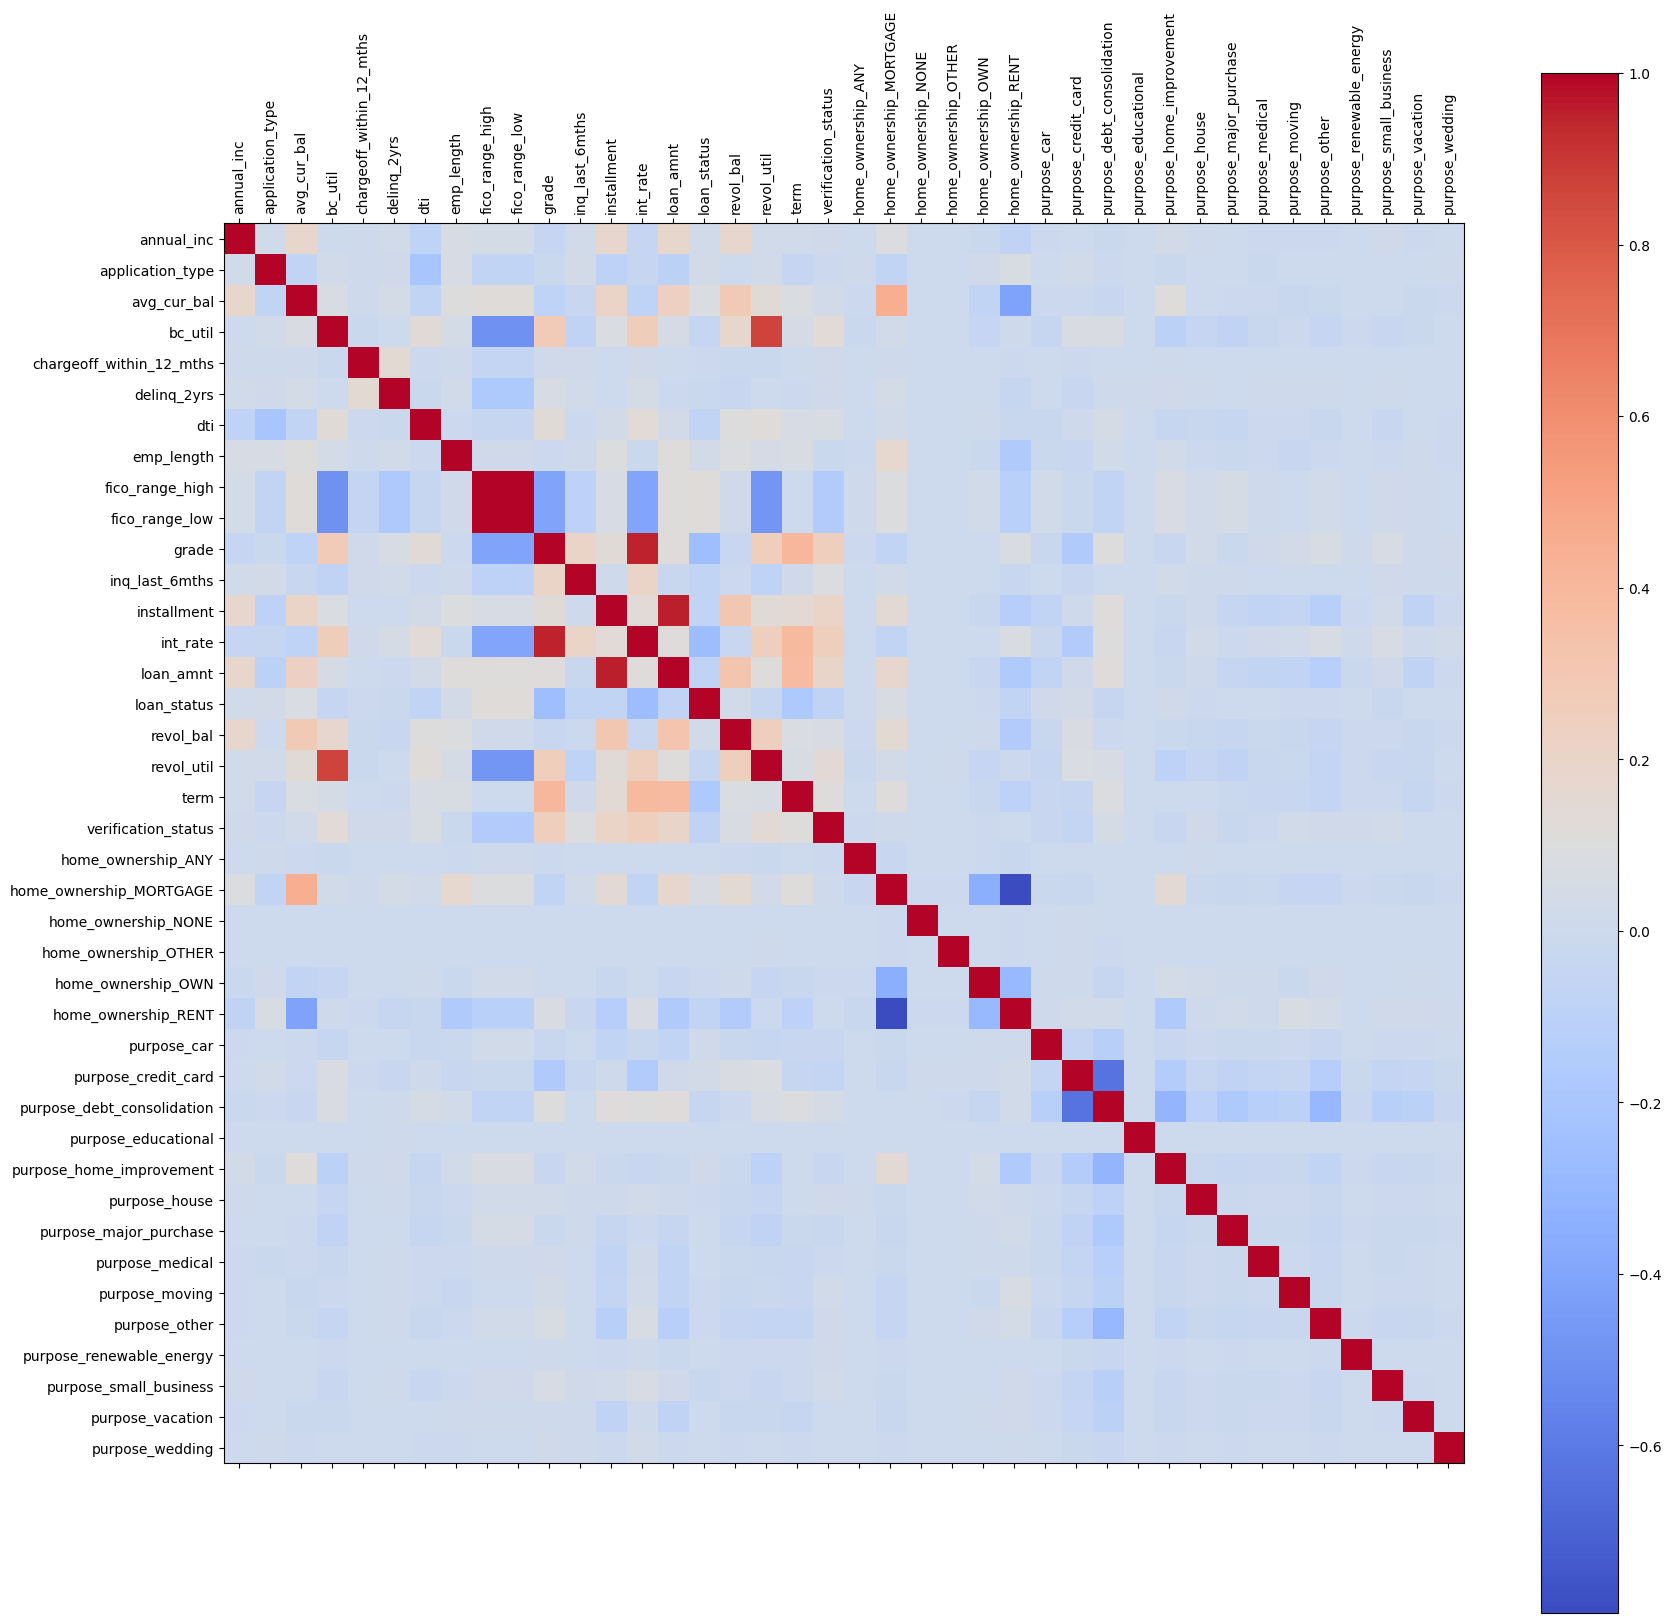

In [37]:
plot_corr(df_sampled.select_dtypes(include=['int64', 'float64', 'bool']), size=20)

#msk = loan_df['loan_status'].isin(['Fully Paid', 'Charged Off'])
#loan_df = loan_df[msk]

#cast issue_d column to datetime for later use
#loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])

#loan_df.to_pickle('../data/Pickle/loan_df0.pkl')

loan_df = pd.read_pickle('./data/Pickle/loan_df0.pkl').sample(frac=.05, random_state=0)

print('Total Number of Rows:', '{:,}'.format(loan_df.shape[0]))
print('Total Number of Columns:', '{:,}'.format(loan_df.shape[1]))